In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

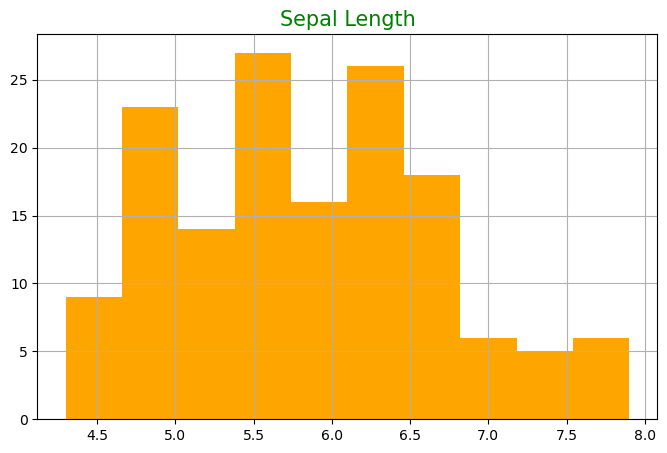

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['sepal length (cm)'],color='Orange')
plt.title('Sepal Length',color='green',fontsize='15')
plt.grid(True)

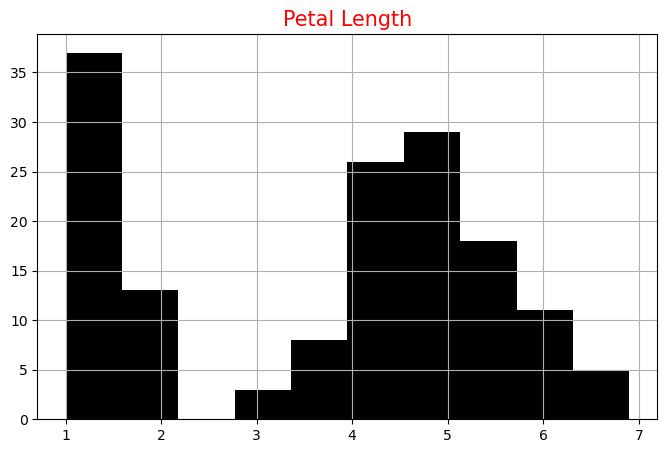

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df['petal length (cm)'],color='black')
plt.title('Petal Length',color='red',fontsize='15')
plt.grid(True)

# KMeans Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans= KMeans(n_clusters=3, random_state=42)

In [15]:
clusters= kmeans.fit_predict(df)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

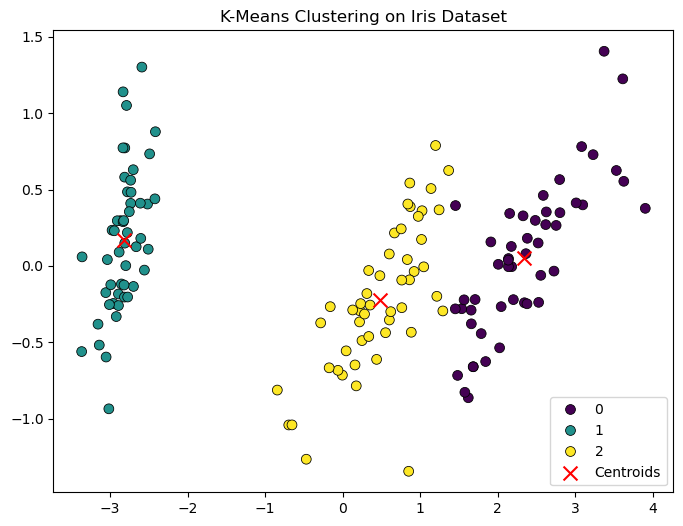

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='viridis', s=50, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Hierarchical Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering as ac

In [21]:
import scipy.cluster.hierarchy as sch

In [22]:
hc = ac(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(df)

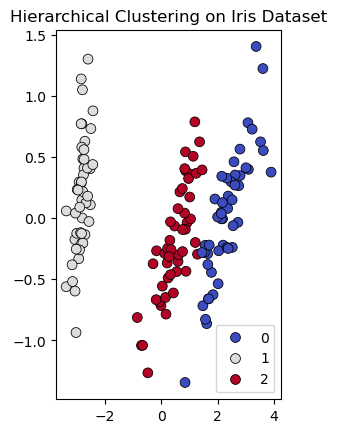

In [23]:
plt.subplot(1,2,2)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=hc_labels, palette='coolwarm', s=50, edgecolor='k')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()

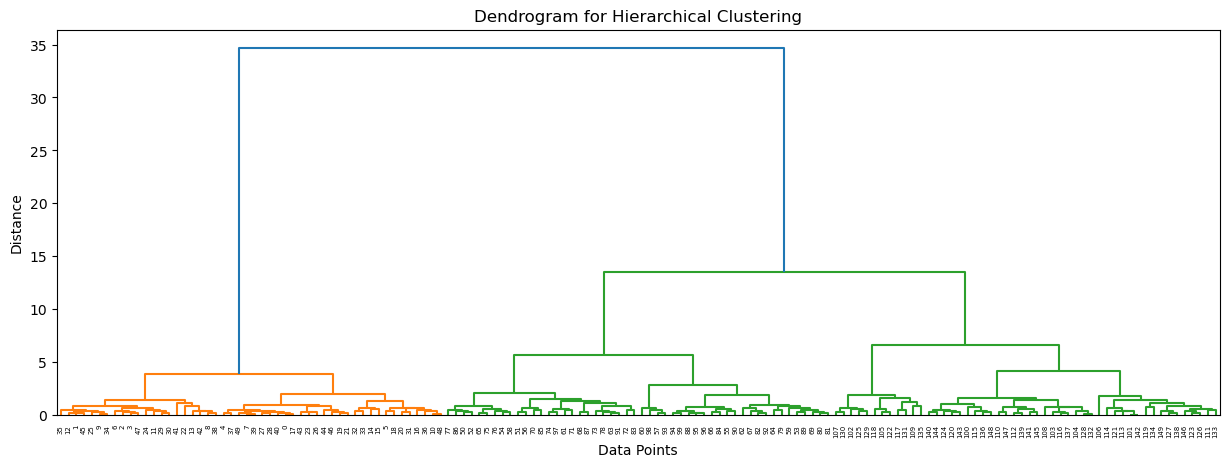

In [24]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

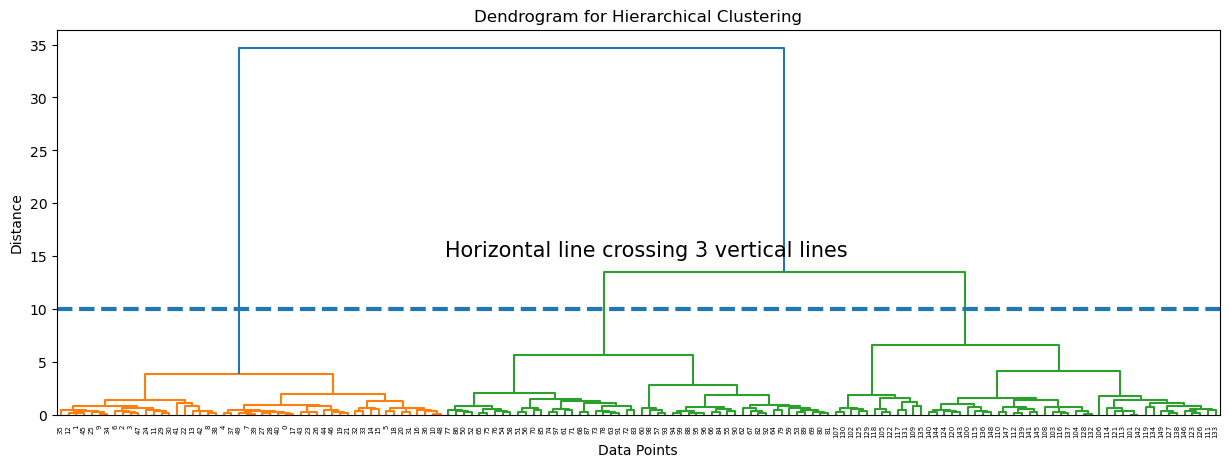

In [25]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.hlines(y=10,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=500,y=15,s='Horizontal line crossing 3 vertical lines',fontsize=15)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()